In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# defining dataset
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

<Axes: >

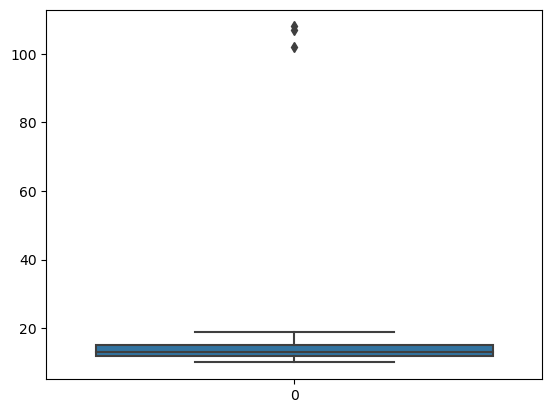

In [4]:
sns.boxplot(dataset)

In [5]:
# using Z score method

outliers = []
def detect_outlier(data):
    max_std = 3 # std deviation
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > max_std:
            outliers.append(i)
    
    return outliers

In [6]:
detect_outlier(dataset)

[102, 107, 108]

IQR method
1. Sort the data
2. Calculate Q1 and Q3
3. Calculate IQR
4. Find the lower fence (Q1 - 1.5(IQR))
5. Find the upper fence (Q3 + 1.5(IQR))

In [7]:
sorted_data = sorted(dataset)

sorted_data

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [8]:
## calculating the q1 and q3

Q1 = np.percentile(sorted_data,25)

Q3 = np.percentile(sorted_data,75)

print(Q1, Q3)

12.0 15.0


In [10]:
## Calculating IQR

IQR = Q3-Q1

IQR

3.0

In [11]:
# calculating lower and upper fence

lower_fence = Q1 - (1.5*IQR)

upper_fence = Q3 + (1.5*IQR)


print(lower_fence, upper_fence)

7.5 19.5


In [18]:
#putting a condition

outliers_iqr = []

for i in sorted_data:
    if i < lower_fence or i > upper_fence:
        if i not in outliers_iqr:
            outliers_iqr.append(i)

outliers_iqr

[102, 107, 108]